In [125]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [103]:
#reading the csv file
df  = pd.read_csv('Simple-Linear-Dataset.csv')
df.head()

,Years_of_Expertise,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [104]:
#assigning variables from datasset x is years of experience and y is salary
x = df[['Years_of_Expertise']]
y = df['Salary']

#test train split and randomizing the sample
x_train, x_test, y_train, y_test = train_test_split(x
                                                    , y
                                                    , test_size=1/3
                                                    , random_state=42
                                                    , shuffle=True                                                   
                                                   )

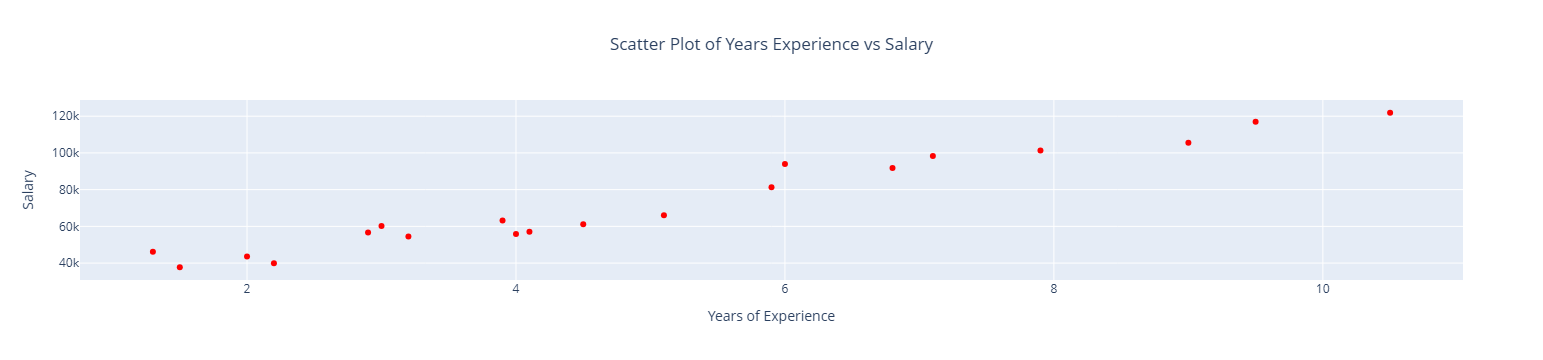

In [139]:
#initial visual exploration of available training dataset
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_train.iloc[:,0].values,y=y_train, mode='markers', line = dict(color='red')))
fig.update_layout(title='Scatter Plot of Years Experience vs Salary'
                 ,title_x = .5 
                 )
fig.update_xaxes(title='Years of Experience')
fig.update_yaxes(title='Salary')
fig.show()

In [113]:
#fitting regression to training set
regression = LinearRegression().fit(x_train,y_train)

In [124]:
#inspecting coefficients
coeffs = pd.Series(regression.coef_, index=x.columns)

print(f'For each year of experience a person can expect {coeffs.values} pay increase.')

For each year of experience a person can expect [9426.03876907] pay increase.


In [131]:
#prediciting salaries on test set
y_pred = regression.predict(x_test)

#understanding years of experience explainability
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('R squared = ',r2)
print('RMSE = ',rmse)

R squared =  0.9553063138044949
RMSE =  5941.540110706558


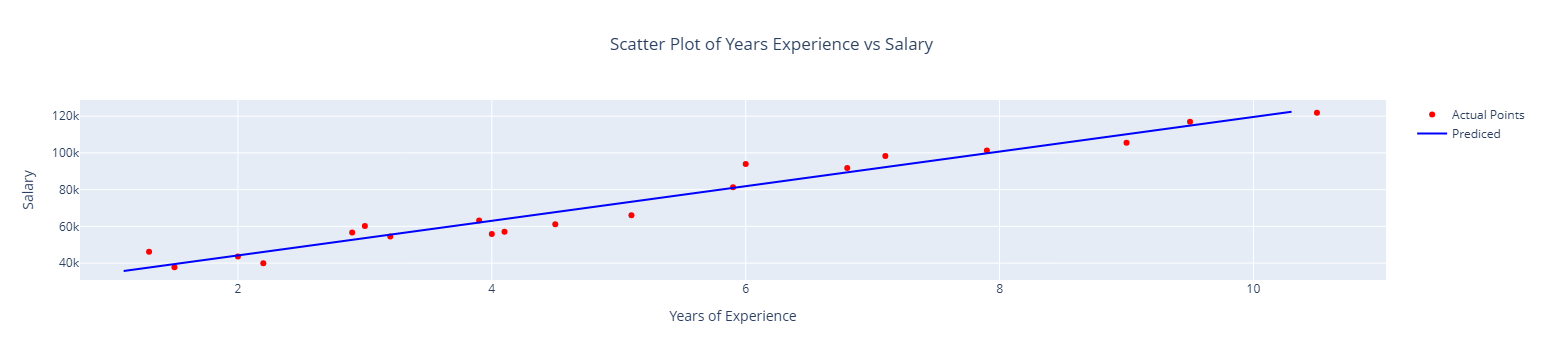

In [152]:
#initial visual exploration of available training dataset
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_train.iloc[:,0].values,y=y_train, mode='markers', line = dict(color='red'), name='Actual Points'))
fig.add_trace(go.Scatter(x=x_test.iloc[:,0].values,y=y_pred, mode='lines', line= dict(color='blue'), name='Prediced'))
fig.update_layout(title='Scatter Plot of Years Experience vs Salary'
                 ,title_x = .5 
                 )
fig.update_xaxes(title='Years of Experience')
fig.update_yaxes(title='Salary')
fig.show()

### Example prediction

In [162]:
## what can an entry level employee expect?
df_example_prediction = pd.DataFrame({'Years_of_Expertise':[0]})
base_pay = regression.predict(df_example_prediction)
print('Starting employees can expect',round(base_pay[0],2),'per year.')

Starting employees can expect 25324.34 per year.
